In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_hinton
from qiskit.visualization import plot_state_paulivec
from qiskit.visualization import plot_bloch_multivector
from qiskit import BasicAer
from qiskit import execute

%matplotlib inline


Question 1/ Dans un ordinateur classique l'information est présente sous la forme de bit pouvant prendre la valeur 0 ou 1

Porte NOT:
Prend en entré un bit 0 ou 1 et renvoie son inverse:
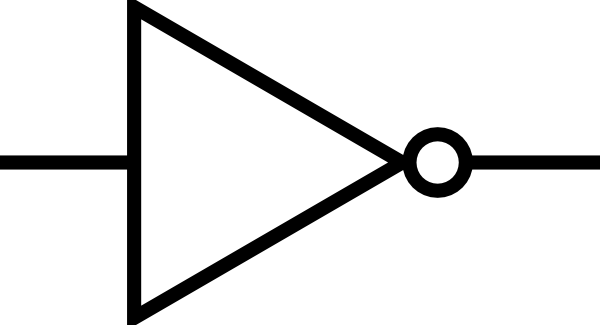

Porte AND:
Prend en entré 2 bit et renvoie 1 si et seulement si les 2 bits valent 1:
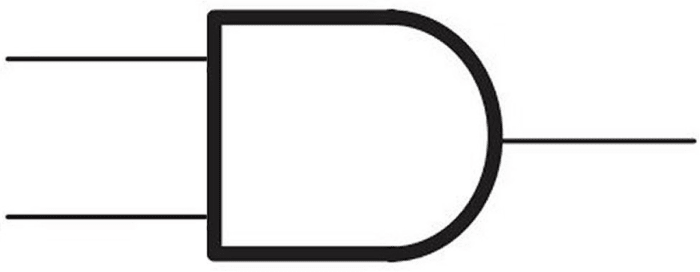

Porte OR:
Prend en entré 2 bit et renvoie 1 si 1 (ou les 2) des 2 bits vaut 1:
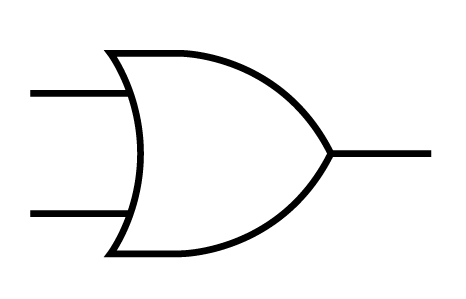

Porte XOR:
Prend en entré 2 bit et renvoie 1 si et seulement si 1 seul des bit vaut 1:
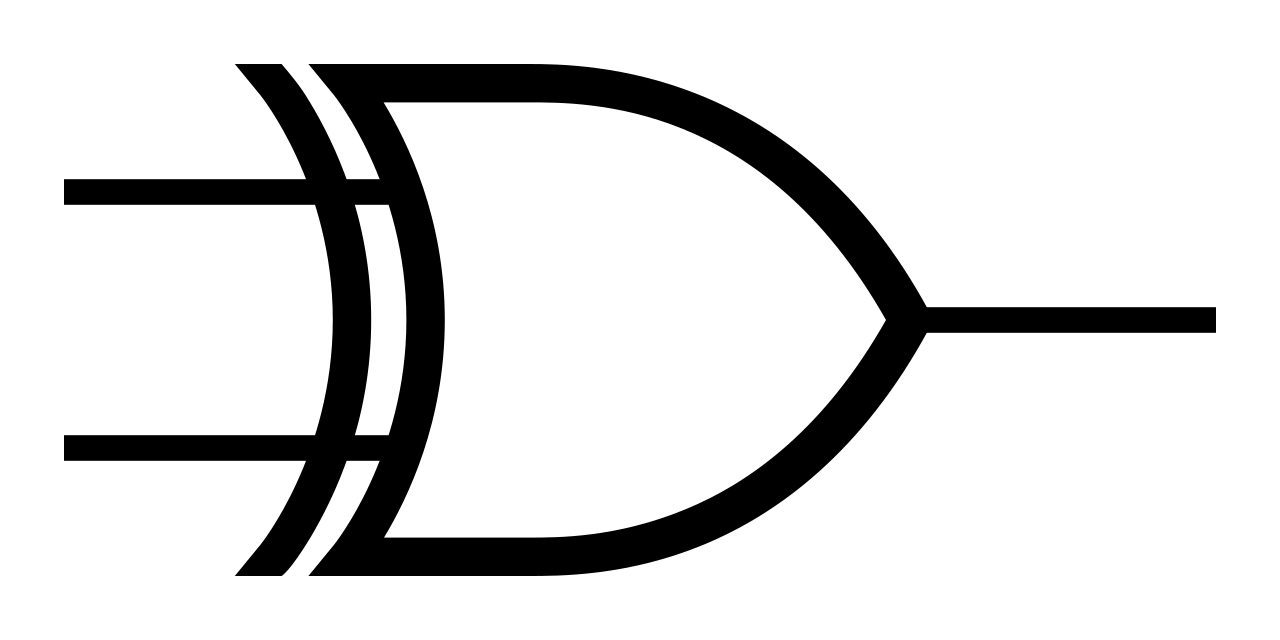

2.1/
1 Qubit peut-être dans l'état 1 -> |1⟩, l'état 0 -> |0⟩ ou dans une superposition de |1⟩ et |0⟩.

|ψ⟩ = 𝛼. |0⟩ + 𝛽. |1⟩ représente l'état superposé d'un qubit avec 𝛼^2 + 𝛽^2 = 1 et dans lequel les probabilité d'obtenir |1⟩ ou |0⟩ lors de la mesure sont notées  P(|0⟩) = 𝛼^2 et P(|1⟩) =  𝛽^2


3/


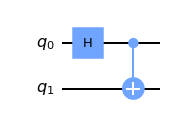

In [2]:
#Création d’un circuit quantique instance de QuantumCircuit
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)
circ.draw('mpl')

Question 2/

H (Hadamard):

La porte H prend en entré 1 qubit dans un état |0⟩ ou |1⟩ et crée un qubit dans un état de supperposition 
|ψ⟩ = 𝛼. |0⟩ + 𝛽.|1⟩ avec 𝛼 = 𝛽
$$ H= \frac{1}{\sqrt2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

$$ H\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt2}\begin{pmatrix} 1 \\ 1 \end{pmatrix} $$


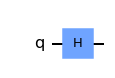

In [3]:
circ = QuantumCircuit(1)
circ.h(0)
circ.draw('mpl')

X(NOT):

La porte X prend en entré 1 qubit et échange les coefficients 𝛼 et 𝛽 -> |ψ⟩ = 𝛼. |0⟩ + 𝛽.|1⟩
X|ψ⟩ = 𝛽. |0⟩ + 𝛼.|1⟩

$$ X= \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

$$ X\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$



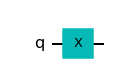

In [4]:
circ = QuantumCircuit(1)
circ.x(0)
circ.draw('mpl')

 CNOT:
 
La porte CNOT, prend en entré 2 qubits, le premier est appelé qubit de contrôle. Si le qubit de contrôle est égale |1⟩ alors on inverse le 2eme qubit |1⟩ -> |0⟩  |1⟩ -> |0⟩
 
 $$ CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$
 
 On note l'état d'un système à 2 qubit: $$ |ψ⟩ = a.|00⟩ + b.|01⟩ + c.|10⟩ + b.|11⟩ = \begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix}$$
 
 On a alors:
 
  $$ CNOT|ψ⟩ =   \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix} = \begin{pmatrix} a \\ b \\ d \\ c \end{pmatrix}$$
 

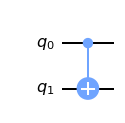

In [5]:
circ = QuantumCircuit(2)
circ.cx(0,1)
circ.draw('mpl')

SWAP:

La porte SWAP, prend en entré 2 qubits et inverse leurs états.

$$ SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

En prenant la même notation que pour la porte CNOT on a:

 $$ SWAP|ψ⟩ =   \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1  \end{pmatrix} \begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix} = \begin{pmatrix} a \\ c \\ b \\ d \end{pmatrix}$$
 

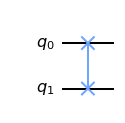

In [6]:
circ = QuantumCircuit(2)
circ.swap(0,1)
circ.draw('mpl')

CCNOT:

La porte CCNOT, prend en entré 3 qubits, les 2 premiers sont des qubit de contrôle (meme fonction que pour la porte CNOT). Si les qubits de contrôle sont égaux à |1⟩ alors on inverse le 3eme qubit |1⟩ -> |0⟩  |1⟩ -> |0⟩


$$ CCNOT = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{pmatrix}$$

On note l'état d'un système à 3 qubit: $$ |ψ⟩ = a.|000⟩ + b.|001⟩ + c.|010⟩ + d.|011⟩ + e.|100⟩ + f.|101⟩ + g.|110⟩ + h.|111⟩ = \begin{pmatrix} a \\ b \\ c \\ d \\ e \\ f \\ g \\ h \end{pmatrix}$$


$$ CCNOT|ψ⟩ =   \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{pmatrix}\begin{pmatrix} a \\ b \\ c \\ d \\ e \\ f \\ g \\ h \end{pmatrix} = \begin{pmatrix} a \\ b \\ c \\ d \\ e \\ f \\ h \\ g \end{pmatrix}$$
 

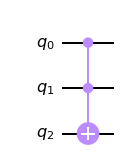

In [7]:
circ = QuantumCircuit(3)
circ.ccx(0,1,2)
circ.draw('mpl')

CSWAP:

La porte SWAP, prend en entré 3 qubits, le premier est qubit de contrôle (meme fonction que pour la porte CNOT). Si le qubit de contrôle est égal à |1⟩ alors on swap le 2ème et 3eme qubit

$$ CSWAP = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{pmatrix}$$

$$ CSWAP|ψ⟩ =   \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{pmatrix}\begin{pmatrix} a \\ b \\ c \\ d \\ e \\ f \\ g \\ h \end{pmatrix} = \begin{pmatrix} a \\ b \\ c \\ d \\ e \\ g \\ f\\ h \end{pmatrix}$$
 

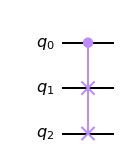

In [8]:
circ = QuantumCircuit(3)
circ.cswap(0,1,2)
circ.draw('mpl')

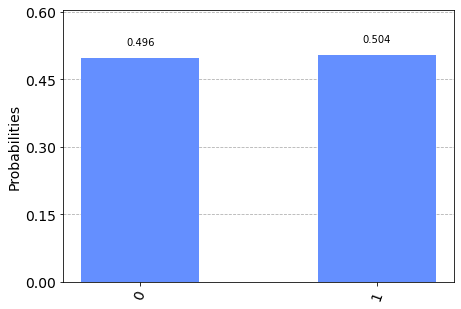

In [9]:
def hGate(nbS,x1,plot):
    circuit = QuantumCircuit(1,1)
    
    if x1==1:
         circuit.x(0)
            
    circuit.h(0)
    if (plot =="state"):
        state = Statevector.from_instruction(circuit)
        return plot_state_qsphere(state)
    if (plot =="city"):
        state = Statevector.from_instruction(circuit)
        return plot_state_city(state)
    if (plot =="hinton"):
        state = Statevector.from_instruction(circuit)
        return plot_state_hinton(state)
    if (plot =="pauli"):
        state = Statevector.from_instruction(circuit)
        return plot_state_paulivec(state)
    if (plot =="bloch"):
        backend = BasicAer.get_backend('statevector_simulator') # the device to run on
        result = execute(circuit, backend).result()
        psi  = result.get_statevector(circuit)
        return plot_bloch_multivector(psi)
    
    circuit.measure([0],[0])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)

    # Draw the circuit
    
    circuit.draw()
    return plot_histogram(counts)
    
hGate(10000,0,"")


/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


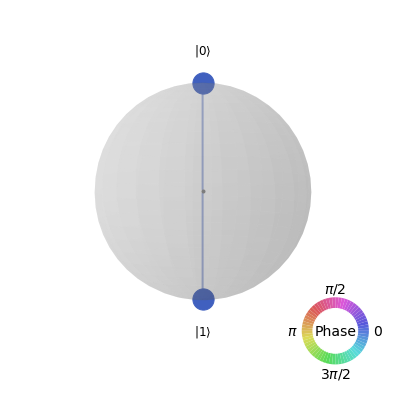

In [10]:
hGate(10000,0,"state")

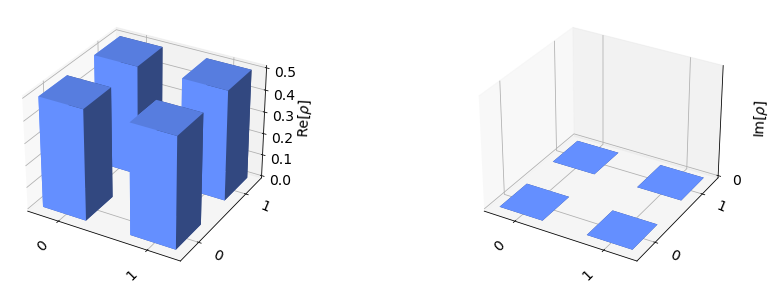

In [11]:
hGate(10000,0,"city")

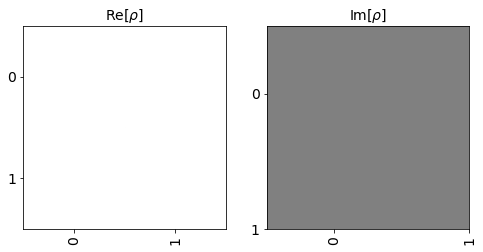

In [12]:
hGate(10000,0,"hinton")

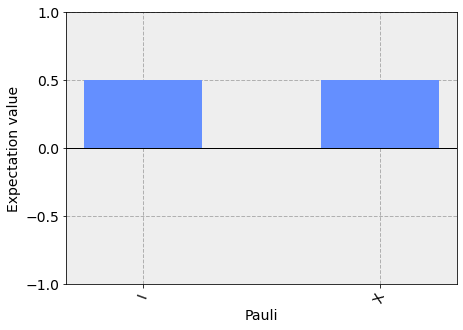

In [13]:
hGate(10000,0,"pauli")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


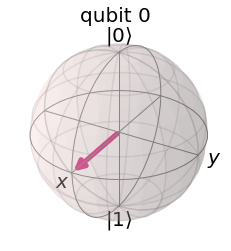

In [14]:
hGate(10000,0,"bloch")

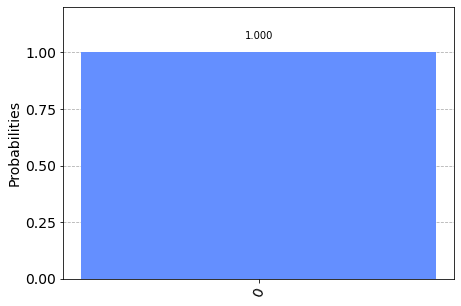

In [15]:
def XGate(nbS,x1,plot):
    circuit = QuantumCircuit(1,1)
    if x1==1:
         circuit.x(0)
            
    circuit.x(0)
    if (plot =="state"):
        state = Statevector.from_instruction(circuit)
        return plot_state_qsphere(state)
    if (plot =="city"):
        state = Statevector.from_instruction(circuit)
        return plot_state_city(state)
    if (plot =="hinton"):
        state = Statevector.from_instruction(circuit)
        return plot_state_hinton(state)
    if (plot =="pauli"):
        state = Statevector.from_instruction(circuit)
        return plot_state_paulivec(state)
    if (plot =="bloch"):
        backend = BasicAer.get_backend('statevector_simulator') # the device to run on
        result = execute(circuit, backend).result()
        psi  = result.get_statevector(circuit)
        return plot_bloch_multivector(psi)
    
    circuit.measure([0],[0])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)

    # Draw the circuit
    circuit.draw()
    return plot_histogram(counts)

    
XGate(10000,1,"")



/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


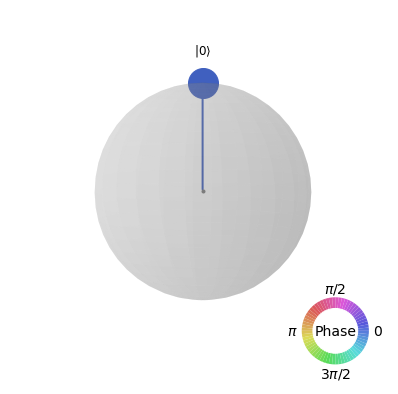

In [16]:
XGate(10000,1,"state")

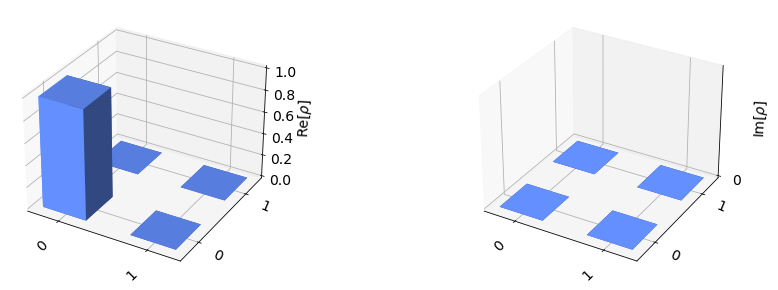

In [17]:
XGate(10000,1,"city")

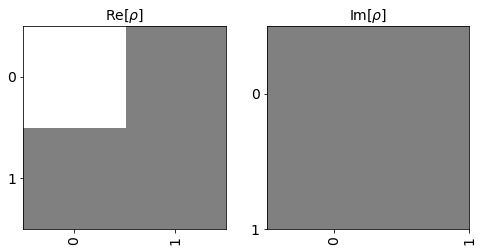

In [18]:
XGate(10000,1,"hinton")

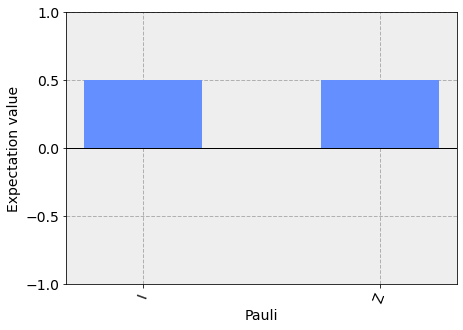

In [19]:
XGate(10000,1,"pauli")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


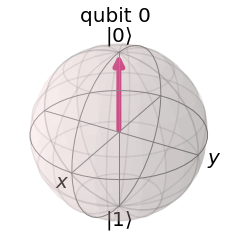

In [20]:
XGate(10000,1,"bloch")

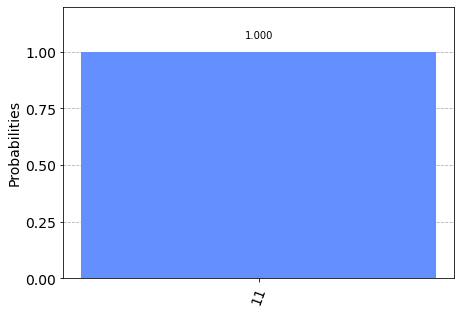

In [21]:
def cnotGate(nbS,x1,x2,plot):
    circuit = QuantumCircuit(2,2)
    if x1==1:
         circuit.x(0)
    if x2==1:
         circuit.x(1)
            
    circuit.cx(0,1)
    if (plot =="state"):
        state = Statevector.from_instruction(circuit)
        return plot_state_qsphere(state)
    if (plot =="city"):
        state = Statevector.from_instruction(circuit)
        return plot_state_city(state)
    if (plot =="hinton"):
        state = Statevector.from_instruction(circuit)
        return plot_state_hinton(state)
    if (plot =="pauli"):
        state = Statevector.from_instruction(circuit)
        return plot_state_paulivec(state)
    if (plot =="bloch"):
        backend = BasicAer.get_backend('statevector_simulator') # the device to run on
        result = execute(circuit, backend).result()
        psi  = result.get_statevector(circuit)
        return plot_bloch_multivector(psi)

    circuit.measure([0,1],[0,1])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)


    circuit.draw()
    return plot_histogram(counts)

    
cnotGate(10000,1,0,"")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


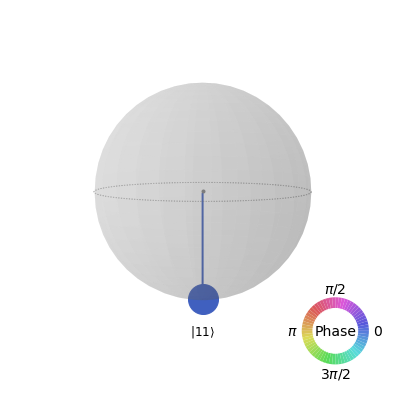

In [22]:
cnotGate(10000,1,0,"state")

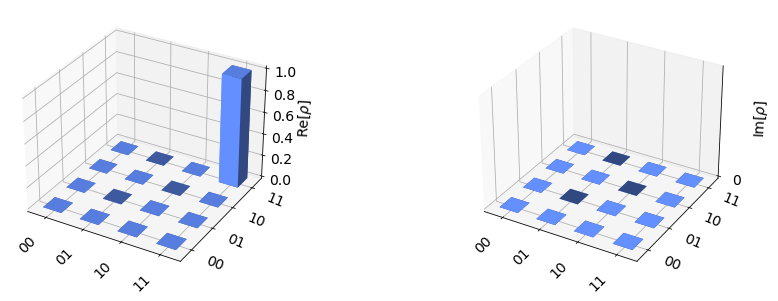

In [23]:
cnotGate(10000,1,0,"city")

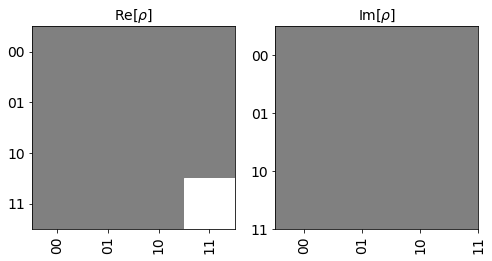

In [24]:
cnotGate(10000,1,0,"hinton")

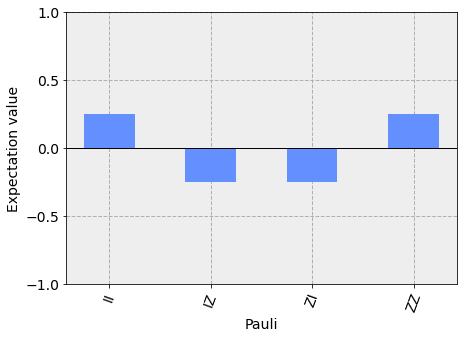

In [25]:
cnotGate(10000,1,0,"pauli")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


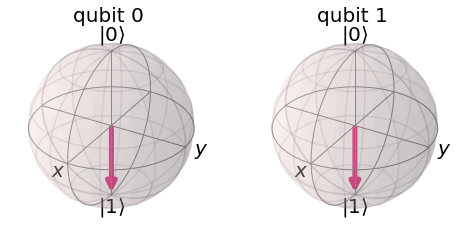

In [26]:
cnotGate(10000,1,0,"bloch")

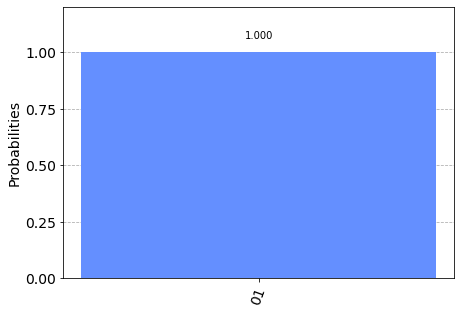

In [27]:
def swapGate(nbS,x1,x2,plot):
    circuit = QuantumCircuit(2,2)
    if x1==1:
         circuit.x(0)
    if x2==1:
         circuit.x(1)
            
    circuit.swap(0,1)
    if (plot =="state"):
        state = Statevector.from_instruction(circuit)
        return plot_state_qsphere(state)
    if (plot =="city"):
        state = Statevector.from_instruction(circuit)
        return plot_state_city(state)
    if (plot =="hinton"):
        state = Statevector.from_instruction(circuit)
        return plot_state_hinton(state)
    if (plot =="pauli"):
        state = Statevector.from_instruction(circuit)
        return plot_state_paulivec(state)
    if (plot =="bloch"):
        backend = BasicAer.get_backend('statevector_simulator') # the device to run on
        result = execute(circuit, backend).result()
        psi  = result.get_statevector(circuit)
        return plot_bloch_multivector(psi)

    circuit.measure([0,1],[0,1])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)

    circuit.draw()
    return plot_histogram(counts)

    
swapGate(10000,0,1,"")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


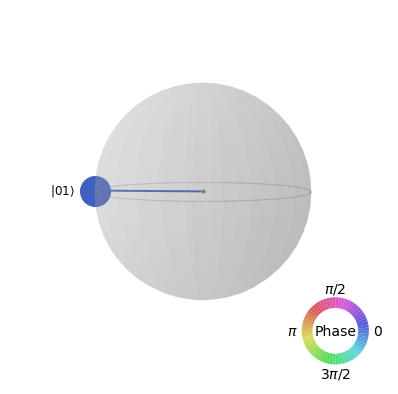

In [28]:
swapGate(10000,0,1,"state")

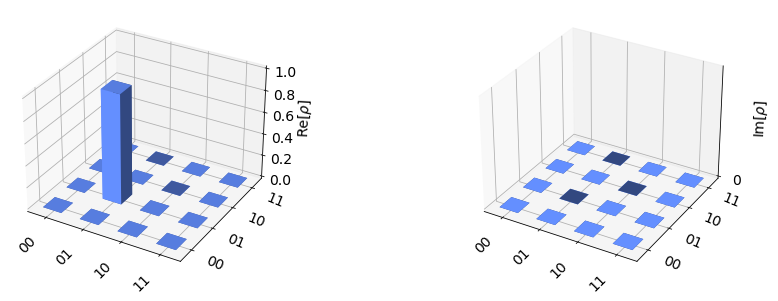

In [29]:
swapGate(10000,0,1,"city")

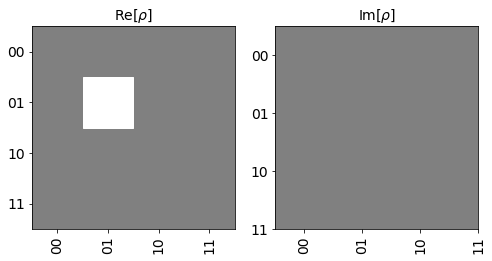

In [30]:
swapGate(10000,0,1,"hinton")

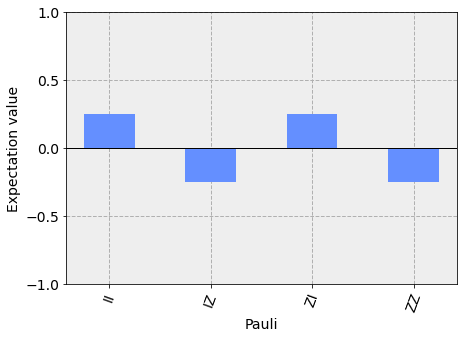

In [31]:
swapGate(10000,0,1,"pauli")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


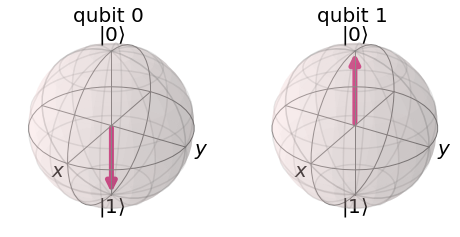

In [32]:
swapGate(10000,0,1,"bloch")

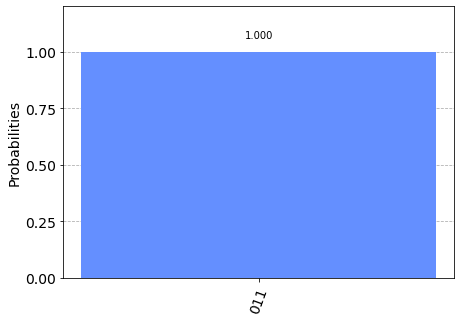

In [33]:
def CswapGate(nbS,x1,x2,x3,plot):
    circuit = QuantumCircuit(3,3)
    if x1==1:
         circuit.x(0)
    if x2==1:
         circuit.x(1)
    if x3==1:
         circuit.x(2)
            
    circuit.cswap(0,1,2)
    if (plot =="state"):
        state = Statevector.from_instruction(circuit)
        return plot_state_qsphere(state)
    if (plot =="city"):
        state = Statevector.from_instruction(circuit)
        return plot_state_city(state)
    if (plot =="hinton"):
        state = Statevector.from_instruction(circuit)
        return plot_state_hinton(state)
    if (plot =="pauli"):
        state = Statevector.from_instruction(circuit)
        return plot_state_paulivec(state)
    if (plot =="bloch"):
        backend = BasicAer.get_backend('statevector_simulator') # the device to run on
        result = execute(circuit, backend).result()
        psi  = result.get_statevector(circuit)
        return plot_bloch_multivector(psi)
    
    circuit.measure([0,1,2],[0,1,2])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)

    circuit.draw()
    return plot_histogram(counts)

    
CswapGate(10000,1,0,1,"")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


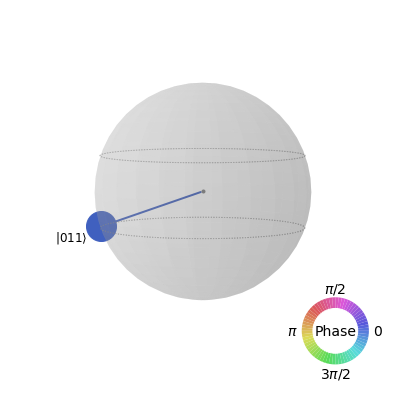

In [34]:
CswapGate(10000,1,0,1,"state")

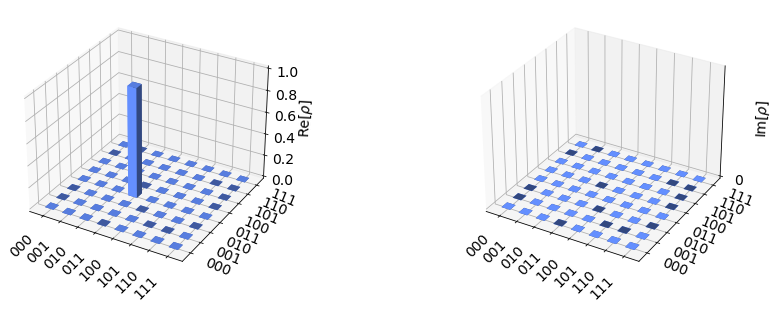

In [35]:
CswapGate(10000,1,0,1,"city")

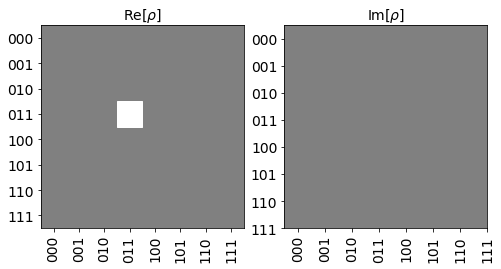

In [36]:
CswapGate(10000,1,0,1,"hinton")

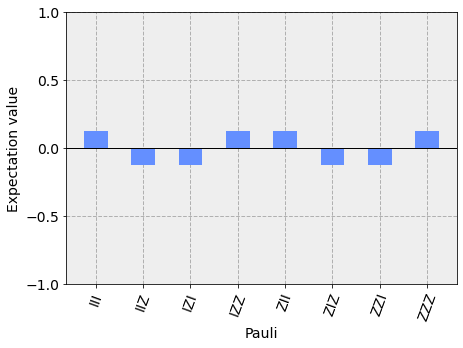

In [37]:
CswapGate(10000,1,0,1,"pauli")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


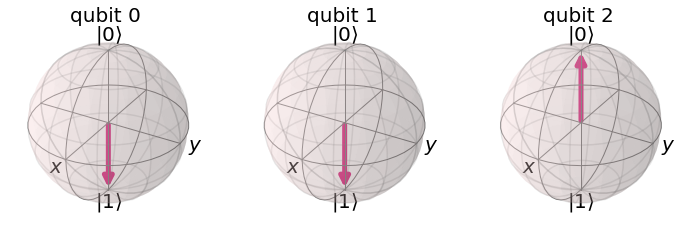

In [38]:
CswapGate(10000,1,0,1,"bloch")

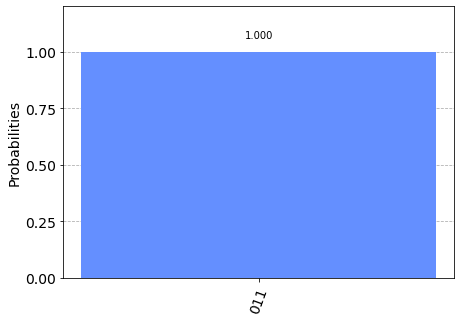

In [39]:
def CCnotGate(nbS,x1,x2,x3,plot):
    circuit = QuantumCircuit(3,3)
    if x1==1:
         circuit.x(0)
    if x2==1:
         circuit.x(1)
    if x3==1:
         circuit.x(2)
            
    circuit.ccx(0,1,2)
    if (plot =="state"):
        state = Statevector.from_instruction(circuit)
        return plot_state_qsphere(state)
    if (plot =="city"):
        state = Statevector.from_instruction(circuit)
        return plot_state_city(state)
    if (plot =="hinton"):
        state = Statevector.from_instruction(circuit)
        return plot_state_hinton(state)
    if (plot =="pauli"):
        state = Statevector.from_instruction(circuit)
        return plot_state_paulivec(state)
    if (plot =="bloch"):
        backend = BasicAer.get_backend('statevector_simulator') # the device to run on
        result = execute(circuit, backend).result()
        psi  = result.get_statevector(circuit)
        return plot_bloch_multivector(psi)
    
    circuit.measure([0,1,2],[0,1,2])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)

    
    return plot_histogram(counts)

    
CCnotGate(10000,1,1,1,"")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


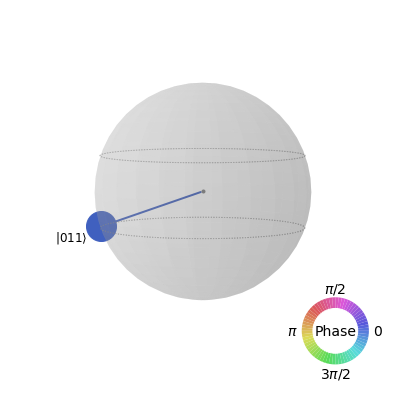

In [40]:
CCnotGate(10000,1,1,1,"state")

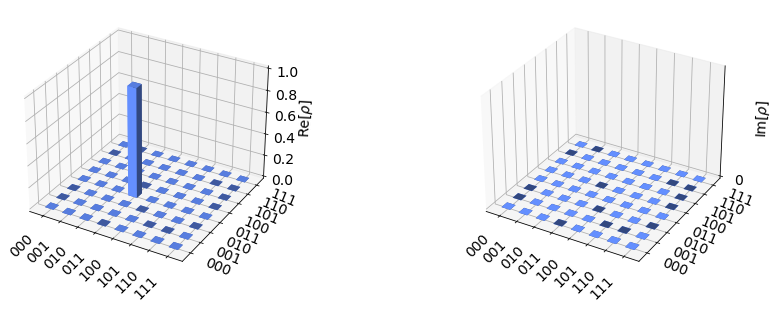

In [41]:
CCnotGate(10000,1,1,1,"city")

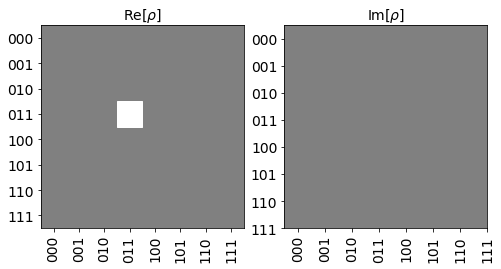

In [42]:
CCnotGate(10000,1,1,1,"hinton")

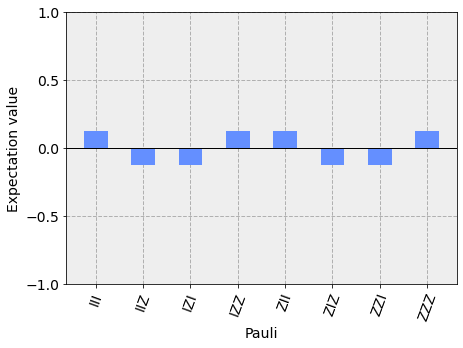

In [43]:
CCnotGate(10000,1,1,1,"pauli")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


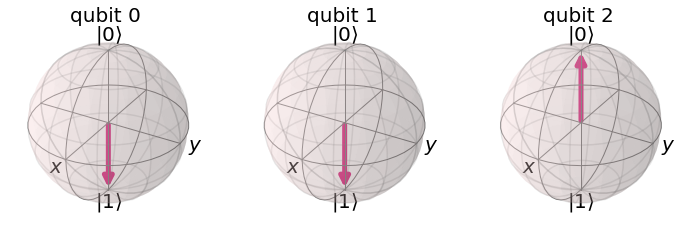

In [44]:
CCnotGate(10000,1,1,1,"bloch")

SWAP avec 3 portes:

In [45]:
circuit = QuantumCircuit(2,2)
circuit.cx(0,1)
circuit.cx(1,0)
circuit.cx(0,1)
circuit.draw()

┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
c: 2/═══════════════

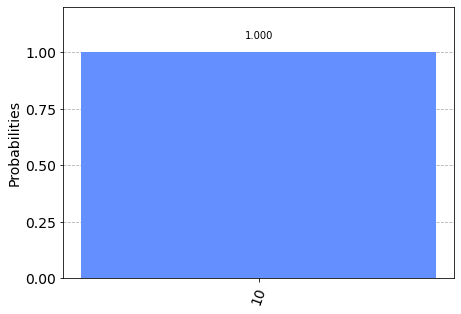

In [46]:
def swap3Gate(nbS,x1,x2):
    circuit = QuantumCircuit(2,2)
    if x1==1:
         circuit.x(0)
    if x2==1:
         circuit.x(1)
            
    circuit.cx(0,1)
    circuit.cx(1,0)
    circuit.cx(0,1)
    circuit.measure([0,1],[0,1])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)


    circuit.draw()
    return plot_histogram(counts)

    
swap3Gate(10000,1,0)

CSWAP avec 3 portes:


In [47]:
circuit = QuantumCircuit(3,3)
circuit.ccx(0, 1, 2)
circuit.ccx(0, 2, 1)
circuit.ccx(0, 1, 2)
circuit.draw()

q_0: ──■────■────■──
       │  ┌─┴─┐  │  
q_1: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_2: ┤ X ├──■──┤ X ├
     └───┘     └───┘
c: 3/═══════════════

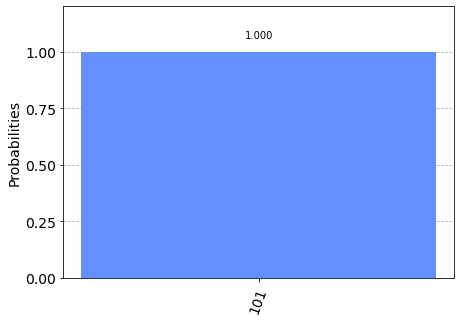

In [48]:
def cswap3Gate(nbS,x1,x2,x3):
    circuit = QuantumCircuit(3,3)

    if x1==1:
         circuit.x(0)
    if x2==1:
         circuit.x(1)
    if x3==1:
         circuit.x(2)
      
    circuit.ccx(0, 1, 2)
    circuit.ccx(0, 2, 1)
    circuit.ccx(0, 1, 2)
    
    circuit.measure([0,1,2],[0,1,2])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    # Returns counts
    counts = result.get_counts(compiled_circuit)

    circuit.draw()
    return plot_histogram(counts)

    
cswap3Gate(10000,1,1,0)

Question 3/

Voici les 4 états de bell:

1/ q0 = |0⟩,q1 = |0⟩ On applique la porte H sur q0:
$$\frac{1}{\sqrt2}(|0⟩ + |1⟩)\otimes|0⟩ = \frac{1}{\sqrt2}(|00⟩ + |10⟩)$$
On applique en ensuite la porte CNOT avec q0 en qbit de controle:
$$\frac{1}{\sqrt2}(|00⟩ + |11⟩)$$


2/ q0 = |0⟩,q1 = |1⟩ On applique la porte H sur q0:
$$\frac{1}{\sqrt2}(|0⟩ + |1⟩)\otimes|1⟩ = \frac{1}{\sqrt2}(|01⟩ + |11⟩)$$
On applique en ensuite la porte CNOT avec q0 en qbit de controle:
$$\frac{1}{\sqrt2}(|01⟩ + |10⟩)$$

3/ q0 = |1⟩,q1 = |0⟩ On applique la porte H sur q0:
$$\frac{1}{\sqrt2}(|0⟩ - |1⟩)\otimes|0⟩ = \frac{1}{\sqrt2}(|00⟩ - |10⟩)$$
On applique en ensuite la porte CNOT avec q0 en qbit de controle:
$$\frac{1}{\sqrt2}(|00⟩ - |11⟩)$$

4/ q0 = |1⟩,q1 = |1⟩ On applique la porte H sur q0:
$$\frac{1}{\sqrt2}(|0⟩ - |1⟩)\otimes|1⟩ = \frac{1}{\sqrt2}(|01⟩ - |11⟩)$$
On applique en ensuite la porte CNOT avec q0 en qbit de controle:
$$\frac{1}{\sqrt2}(|01⟩ - |10⟩)$$



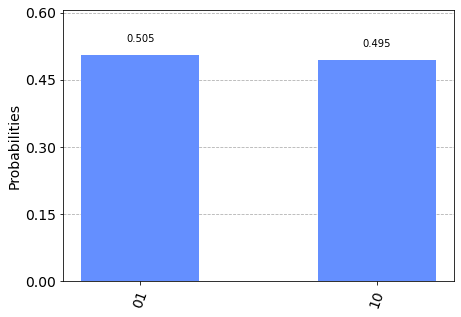

In [49]:
def bell(nbS,x1,x2,plot):
    circuit = QuantumCircuit(2,2)
    if x1==1:
         circuit.x(0)
    if x2==1:
         circuit.x(1)
            
    circuit.h(0)
    circuit.cx(0,1)

    if (plot =="state"):
        state = Statevector.from_instruction(circuit)
        return plot_state_qsphere(state)
    if (plot =="city"):
        state = Statevector.from_instruction(circuit)
        return plot_state_city(state)
    if (plot =="hinton"):
        state = Statevector.from_instruction(circuit)
        return plot_state_hinton(state)
    if (plot =="pauli"):
        state = Statevector.from_instruction(circuit)
        return plot_state_paulivec(state)
    if (plot =="bloch"):
        backend = BasicAer.get_backend('statevector_simulator') # the device to run on
        result = execute(circuit, backend).result()
        psi  = result.get_statevector(circuit)
        return plot_bloch_multivector(psi)
    
    circuit.measure([0,1],[0,1])

    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)

    job = simulator.run(compiled_circuit, shots=nbS)

    result = job.result()

    counts = result.get_counts(compiled_circuit)

    circuit.draw()
    return plot_histogram(counts)
    
bell(10000,1,1,"")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


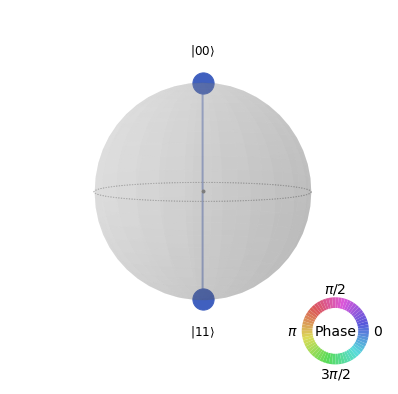

In [50]:
bell(10000,0,0,"state")

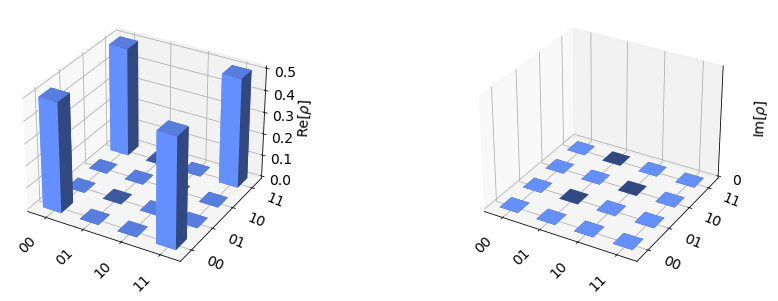

In [51]:
bell(10000,0,0,"city")

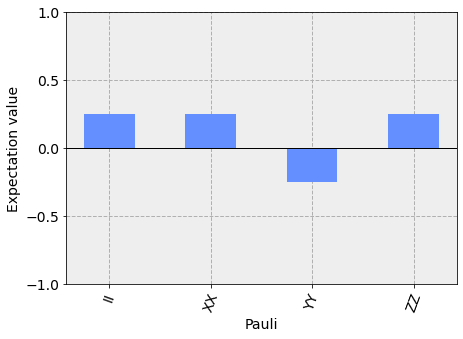

In [52]:
bell(10000,0,0,"pauli")

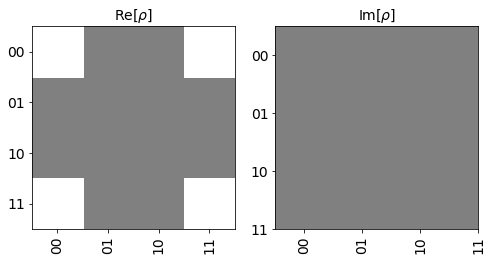

In [53]:
bell(10000,0,0,"hinton")

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


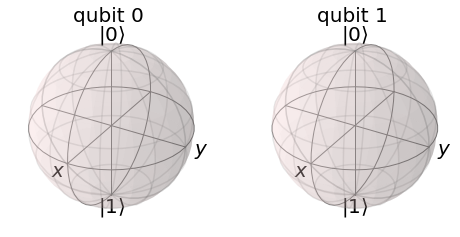

In [54]:
bell(10000,0,0,"bloch")

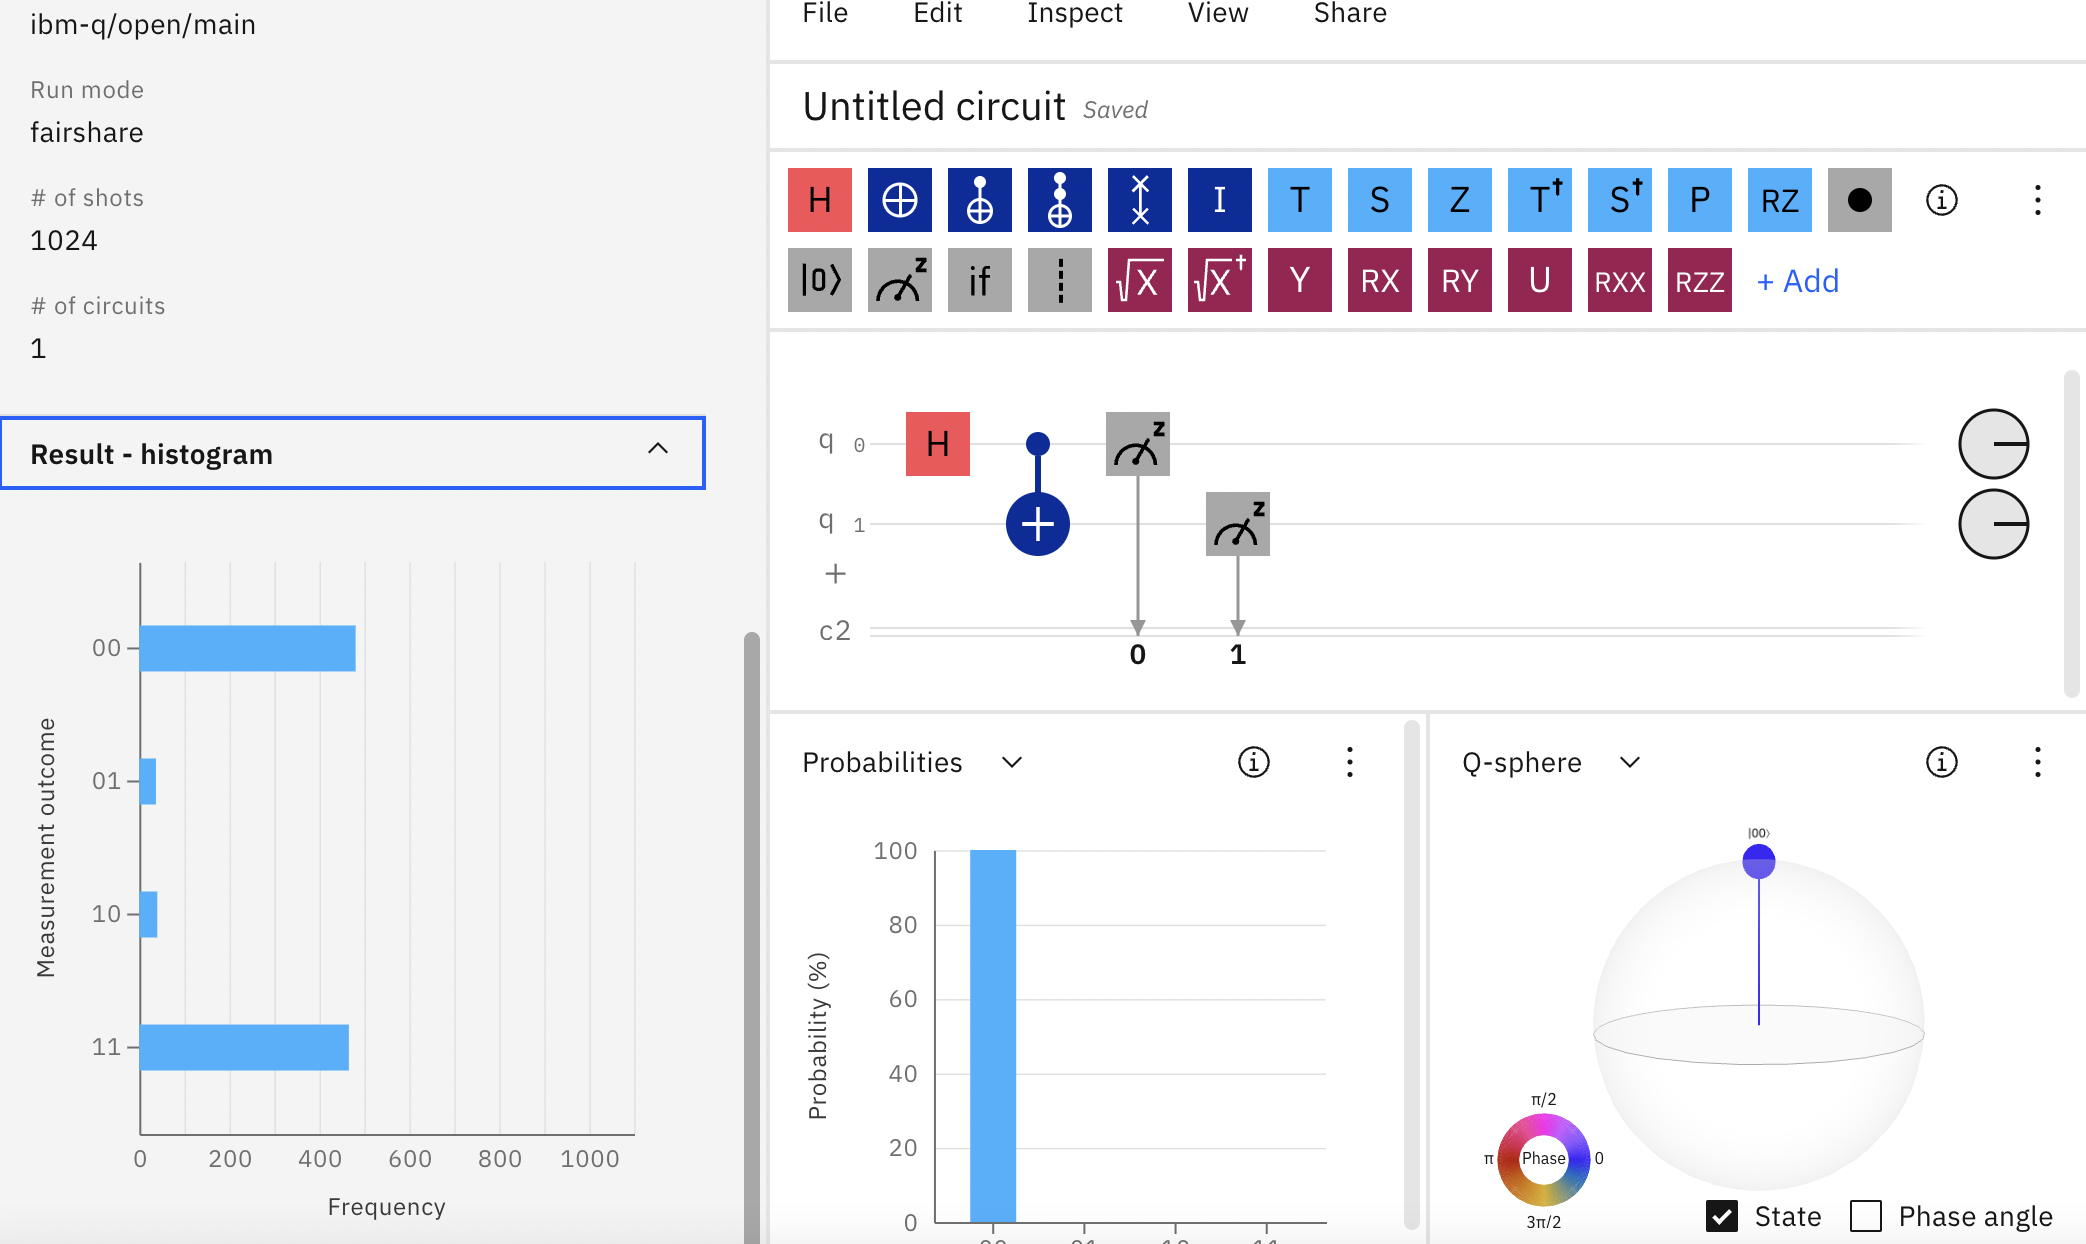

configrc.store_credentials:WARNING:2021-10-17 21:20:24,500: Credentials already present. Set overwrite=True to overwrite.


Job Status: job has successfully run


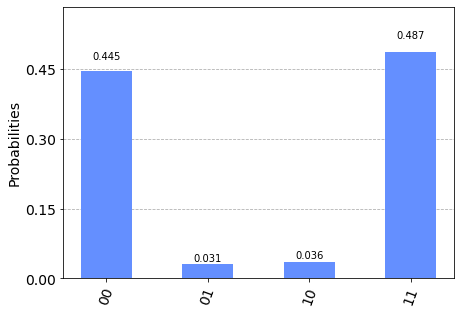

In [55]:
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ
IBMQ.save_account("4361710b3c0631d50aeb0306347dc3b4a91bbe8f1d6527cc7b762fa4750f386e3818018341ccfe5bfb0a0d226ae7a40fa0432cc7d10f87562860d8106f80454d")
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcomp = provider.get_backend('ibmq_belem') #provider.backend(simulator = false, operational = true)

circuit = QuantumCircuit(2,2)       
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])

job = execute(circuit, backend=qcomp)
job_monitor(job)
result_hard = job.result()
plot_histogram(result_hard.get_counts(circuit))





Question 4/

In [56]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

Circuit permettant la téléportation

In [57]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)
#On commence par créer une paire intriqué, on donne 1 qubit de la pair à Alice et Bob -les 2 participants de la teleportation-
teleportation_circuit.h(1) 
teleportation_circuit.cx(1,2) 
teleportation_circuit.barrier() 
#Alice applique la porte CNOT sur le qbit de la paire intriqué, controllé par q0 le qubit quelle souhaite envoyé.
teleportation_circuit.cx(0, 1)
#Elle applique ensuite H sur le qubit qu'elle souhaite envoyé, q0.
teleportation_circuit.h(0)

teleportation_circuit.barrier()
#Alice mesure ensuite les 2 qubits qu'elle possède
teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)
teleportation_circuit.barrier() 

#En fonction de ces mesures Bob appliquera X sur son qubit si q1 = 1 et/ou Z si q0 = 1
teleportation_circuit.x(2).c_if(crx, 1) 
teleportation_circuit.z(2).c_if(crz, 1) 

teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐    ░               
  q_0: ───────────░───■──┤ H ├─░─┤M├────░───────────────
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                  ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════╩══╬═══════╬═══╡ = 1 ╞
                                  0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════╩════╡ = 1 ╞═══════
                                     0    └─────┘

In [58]:
def teleport(qubit):
    init_gate = Initialize(qubit)
    init_gate.label = "init"

    qr = QuantumRegister(3, name="q")
    crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
    teleportation_circuit = QuantumCircuit(qr, crz, crx)

    teleportation_circuit.append(init_gate, [0])
    teleportation_circuit.barrier()


    teleportation_circuit.h(1) 
    teleportation_circuit.cx(1,2) 
    teleportation_circuit.barrier() 
    teleportation_circuit.cx(0, 1)
    teleportation_circuit.h(0)

    teleportation_circuit.barrier()
    teleportation_circuit.measure(0,0)
    teleportation_circuit.measure(1,1)
    teleportation_circuit.barrier() 

    teleportation_circuit.x(2).c_if(crx, 1) 
    teleportation_circuit.z(2).c_if(crz, 1)

    sim = Aer.get_backend('aer_simulator')
    teleportation_circuit.save_statevector()
    out_vector = sim.run(teleportation_circuit).result().get_statevector()
    return plot_bloch_multivector(out_vector)


<IPython.core.display.Latex object>

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


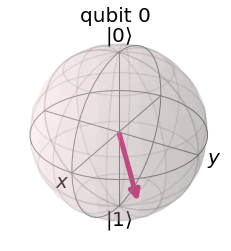

In [59]:
#On crée un qubit dans un état aléatoire

qubit = random_statevector(2)

display(array_to_latex(qubit , prefix="|\\psi\\rangle ="))
plot_bloch_multivector(qubit )

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


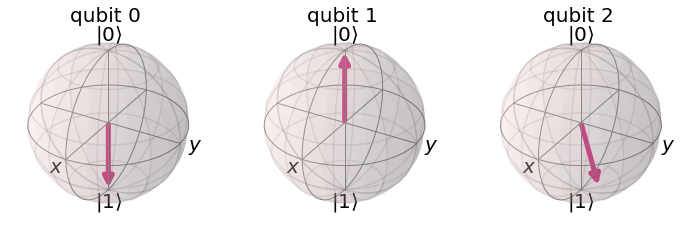

In [60]:
teleport(qubit )

On voit bien que le qubit2 est dans le même état que celui envoyé, le qubit a donc bien été téléporté. 